In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving yeast_USC.tif to yeast_USC.tif


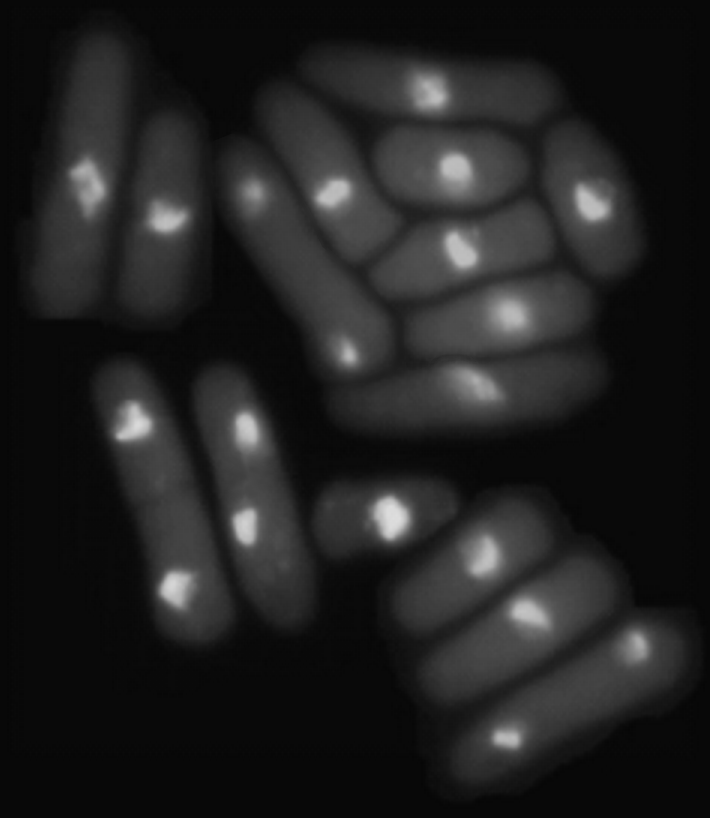

In [2]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('yeast_USC.tif', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I)

In [3]:
#Step2. OpenCV의 GaussianBlur 함수를 이용해 원래 이미지에 blur 처리를 하세요. (kernel의 크기와 sigma 값은 자유롭게)

gaussian_blur_I = cv2.GaussianBlur(I,(5,5),5)

In [4]:
threshold_value, I_Otsu = cv2.threshold(gaussian_blur_I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(threshold_value)

42.0


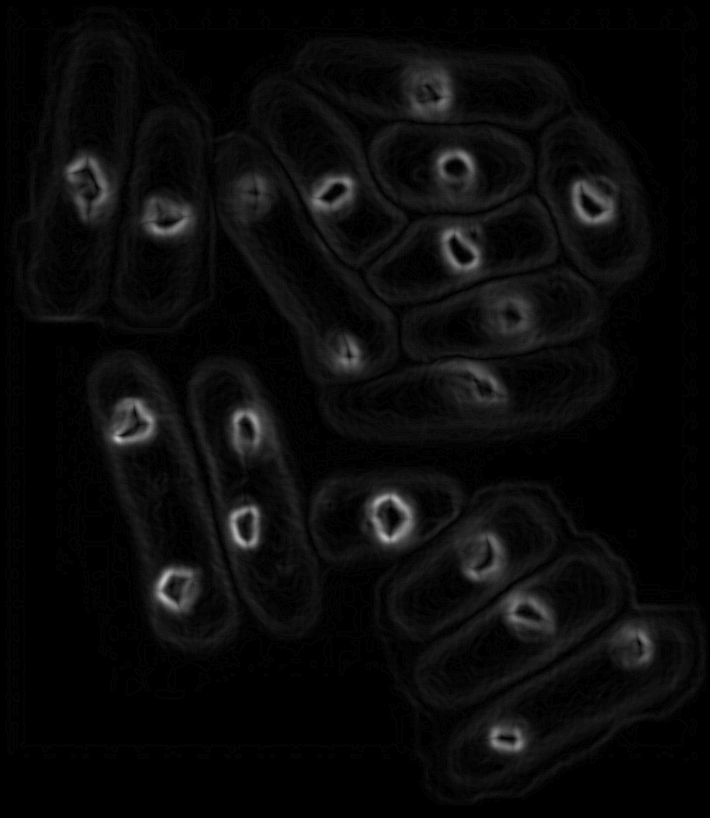

In [5]:
sobel_I_x = cv2.Sobel(gaussian_blur_I, cv2.CV_64F, 1,0, 3)
sobel_I_x = cv2.convertScaleAbs(sobel_I_x)
sobel_I_y = cv2.Sobel(gaussian_blur_I, cv2.CV_64F, 0,1, 3)
sobel_I_y = cv2.convertScaleAbs(sobel_I_y)
sobel_I = np.abs(sobel_I_x) + np.abs(sobel_I_y)
cv2_imshow(sobel_I)

In [7]:
threshold_value2, sobel_I_Otsu = cv2.threshold(sobel_I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(threshold_value2)

36.0


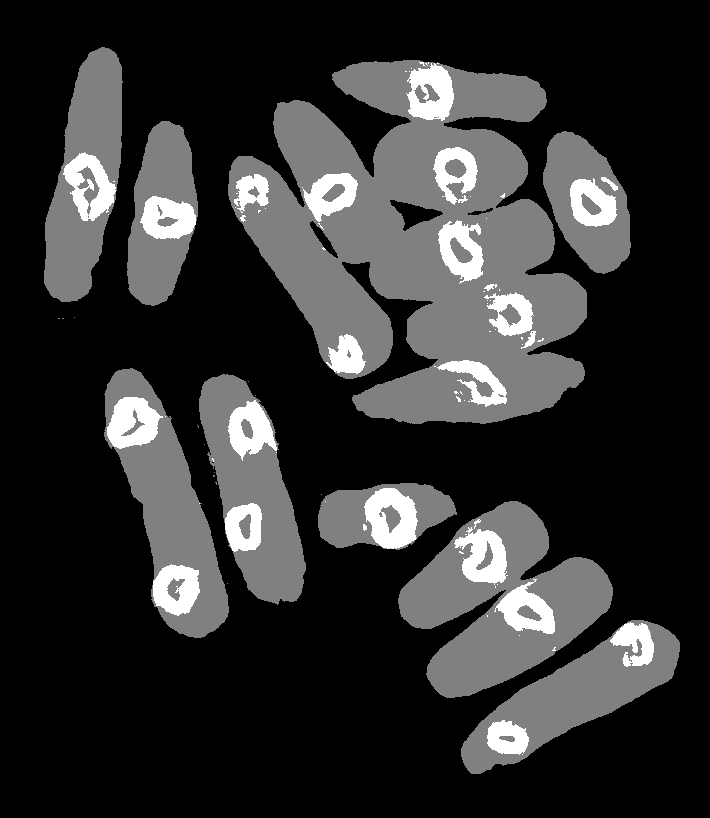

In [29]:
multiple_threshold = (
    cv2.threshold(gaussian_blur_I, 42, 128, cv2.THRESH_BINARY)[1] +
    cv2.threshold(sobel_I, 36, 127, cv2.THRESH_BINARY)[1]
)

cv2_imshow(multiple_threshold)

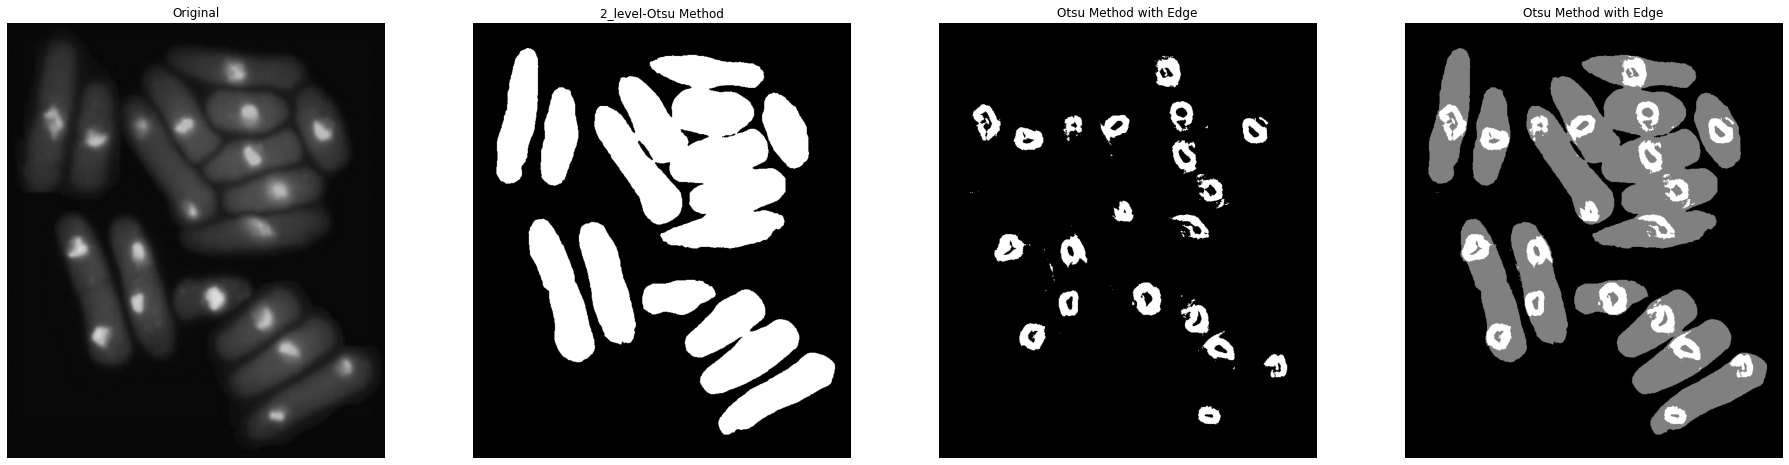

In [31]:
fig = plt.figure(figsize = (32, 8)) 
rows = 1
cols = 4
  
ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")

ret2, I_Otsu = cv2.threshold(gaussian_blur_I, 0, 255, cv2.THRESH_OTSU)
ax2 = fig.add_subplot(rows, cols, 2)
I_Otsu_RGB = cv2.cvtColor(I_Otsu, cv2.COLOR_GRAY2RGB)
ax2.imshow(I_Otsu_RGB)
ax2.set_title('2_level-Otsu Method')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
sobel_I_Otsu_RGB = cv2.cvtColor(sobel_I_Otsu, cv2.COLOR_GRAY2RGB)
ax3.imshow(sobel_I_Otsu_RGB)
ax3.set_title('Otsu Method with Edge')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
multiple_threshold_RGB = cv2.cvtColor(multiple_threshold, cv2.COLOR_GRAY2RGB)
ax4.imshow(multiple_threshold_RGB)
ax4.set_title('Otsu Method with Edge')
ax4.axis("off")

plt.show()